In [1]:
import pandas as pd
import numpy as np

#### Why series is 1D object and Dataframe is 2D object?

- For series in order to get the particular value, we need only one piece of information i.e. its corrosponding index value.
- For dataframe in order to get the particular value, we need two pieces of information. For example - In a Dataframe we want particular student
subject marks, we first need the student name and then the specific subject.

#### Creating a Multi index series 

In [2]:
index_val=[('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a=pd.Series([1,2,3,4,5,6,7,8],index=index_val)
#The below is called the multi indexing
#Now if I want value 4
a[('cse',2022)]

np.int64(4)

But there is a problem in the above multi indexing. If I want all the cse numbers then, I cannot do this a['cse']. This will 
throw an error.

The solution is multiindex series(Also, Known as Hierarchical Indexing)

In [3]:
#pd.Multiindex.from_tuples()

a=pd.MultiIndex.from_tuples(index_val)
#This multiindex has the power to decouple the index. 
print(a.levels)  #This will show what different types of values we have in our multiindex series
print(a.levels[1])
a.levels[0]

[['cse', 'ece'], [2019, 2020, 2021, 2022]]
Index([2019, 2020, 2021, 2022], dtype='int64')


Index(['cse', 'ece'], dtype='object')

In [4]:
#Another way of creating the multiindex series

pd.MultiIndex.from_product([['mech','chemical'],[2019,2020,2021,2022]])

MultiIndex([(    'mech', 2019),
            (    'mech', 2020),
            (    'mech', 2021),
            (    'mech', 2022),
            ('chemical', 2019),
            ('chemical', 2020),
            ('chemical', 2021),
            ('chemical', 2022)],
           )

In [5]:
series=pd.Series(data=[1,2,3,4,5,6,7,8],index=a)
series

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [6]:
print(series['cse'])   #As we can see now using Multi index series we can get the rows only of CSE
print(series['cse'][2022])
print(series['cse',2022])
print(series[('cse',2022)])

2019    1
2020    2
2021    3
2022    4
dtype: int64
4
4
4


In [7]:
series.ndim
#It means the multiindex series is a 1D. Although in order to get the value 4 we have to use CSE and 2022, but i.e. because 
#the index is a tuple. Not because it is 2D. Our index has two values. 

1

#### Unstack 
- We have two level of indexing in Series. Level-0 where we have the Major. And Level-1 where we have the year.
- Unstack convert the Level-1 indexing into the columns as level-1 is by default. 

In [8]:
a.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [9]:
#Unstack
print(a.levels[1])
print("*"*34)
print(a.levels[0])
print("*"*34)
temp_df=series.unstack()    #Unstack function can convert the Multiindex series into DF
print("*"*34)
temp_df

Index([2019, 2020, 2021, 2022], dtype='int64')
**********************************
Index(['cse', 'ece'], dtype='object')
**********************************
**********************************


,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [10]:
series.unstack(level=0)

,cse,ece
2019,1,5
2020,2,6
2021,3,7
2022,4,8


#### Stack
- Stack convert the columns into the rows.

In [11]:
#Stack
temp_df.stack()

#For the temp_df case we had two columns, but stack converted both the columns into the rows. Hence, only one column left.

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

#### Why it is necessary to create the multiindex series, when we can do the same work with much easier way using the DF?
- The reason behind studying the Multiindex series is, by using it we can convert the higher dimension data and can represent
  it into the series. 

In [12]:
#Multiindex Dataframe

branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = a,
    columns = ['avg_package','students' ]
)
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [13]:
print(branch_df1.loc['cse'])
print('\n')
print(branch_df1['students'])

      avg_package  students
2019            1         2
2020            3         4
2021            5         6
2022            7         8


cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64


In [14]:
branch_df2 = pd. DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex. from_product( [['delhi','mumbai'], ['avg_package' ,'students' ]]))

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [15]:
branch_df2.ndim   #As we can see it is 2D

2

In [16]:
branch_df2['delhi']['avg_package']

2019    1
2020    3
2021    5
2022    7
Name: avg_package, dtype: int64

In [17]:
branch_df2['mumbai']

,avg_package,students
2019,0,0
2020,0,0
2021,0,0
2022,0,0


In [18]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = a,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'], ['avg_package' ,'students' ]])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [19]:
#Now if we wan the value 4

branch_df3.loc['cse',2020]['delhi']['students']

np.int64(4)

In [20]:
#Stacking and Unstacking
branch_df1.unstack()   #Agin unstack convert the level 1 indexing into the columns

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [21]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [22]:
branch_df1.unstack().unstack()
#If we do unstack again, it will convert the remaining level of index into the column and there will be just a column left, means Series

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [23]:
branch_df1.unstack().unstack().unstack()
#If we do unstack one more time then from series it will again get converted into Dataframe

cse  ece
avg_package 2019    1    9
            2020    3   11
            2021    5   13
            2022    7   15
students    2019    2   10
            2020    4   12
            2021    6   14
            2022    8   16

In [24]:
branch_df1.unstack().stack()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16940\1991893145.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack()


avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [25]:
branch_df1.unstack().stack().stack()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16940\2994828746.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack().stack()


cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [26]:
branch_df2.unstack()   #Moving the index to the column position

delhi   avg_package  2019    1
                     2020    3
                     2021    5
                     2022    7
        students     2019    2
                     2020    4
                     2021    6
                     2022    8
mumbai  avg_package  2019    0
                     2020    0
                     2021    0
                     2022    0
        students     2019    0
                     2020    0
                     2021    0
                     2022    0
dtype: int64

In [27]:
branch_df2.stack()   #Moving the column to the index position

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16940\131341568.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack()   #Moving the column to the index position


delhi  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0
2022 avg_package      7       0
     students         8       0

In [28]:
branch_df3.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0

In [29]:
branch_df3.shape

(8, 4)

In [30]:
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [31]:
#Extracting Rows and Columns

#Row for 2022 of CSE
branch_df3.loc['cse',2022]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [32]:
#Now we want (CSE,2019) (CSE,2022) (ECE,2020)
branch_df3.loc[('cse',2019):('ece',2019):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [33]:
#Now we want (CSE,2019) (CSE,2022) (ECE,2020)
branch_df3.loc[[('cse',2019),('cse',2022),('cse',2021)]]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2022           7        8           0        0
    2021           5        6           0        0

In [34]:
#We can do the same using the iloc
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [35]:
#Extracting the columns

#Let's say if we want delhi columns
branch_df3['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [36]:
#If we want delhi and students
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [37]:
#Extracting Multiple columns

branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [38]:
branch_df3[[('delhi','students'),('mumbai','avg_package')]]    #It is very simple. Just remember we have two levels.
#Level 0 which is the city and Level 1 which is students and avg_package. Now, we have multiindex on columns means 
#it is a result of cartesian product of two tuples (delhi,mumbai) (students,avg_package)

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [39]:
#Now if we want CSE 1st row and ece 2nd row. Also, in that I want delhi students and mumbai average package
rows=[('cse',2020),('ece',2021)]
columns=[('delhi','students'),('mumbai','avg_package')]
branch_df3.loc[rows,columns]

,,delhi,mumbai
,,students,avg_package
cse,2020,4,0
ece,2021,14,0


In [40]:
import pandas as pd

index = pd.MultiIndex.from_product(
    [['A', 'B'], [2021, 2022, 2023]],
    names=['dept', 'year']
)

columns = pd.MultiIndex.from_product(
    [['NY', 'SF'], ['revenue', 'employees']],
    names=['city', 'metric']
)

df = pd.DataFrame(
    [
        [10, 5, 20, 8],
        [12, 6, 22, 9],
        [14, 7, 24, 10],
        [30, 15, 40, 18],
        [32, 16, 42, 19],
        [34, 17, 44, 20],
    ],
    index=index,
    columns=columns
)



Q-1 Select rows:

(A, 2021)

(B, 2023)

And columns:

(NY, revenue)

(SF, employees)

In [41]:
rows=[('A',2021),('B',2023)]
columns=[('NY','revenue'),('SF','employees')]
df.loc[rows,columns]

,city,NY,SF
,metric,revenue,employees
dept,year,,
A,2021,10,8
B,2023,34,20


Q-2 Get all years for dept A, but only NY data (both metrics).

In [42]:
df.loc['A']['NY']
df.loc['A','NY']

metric,revenue,employees
year,,
2021,10,5
2022,12,6
2023,14,7


Q-3 Extract employees across all departments and years, for both cities.

In [43]:
df[[('NY','employees'),('SF','employees')]]

city             NY        SF
metric    employees employees
dept year                    
A    2021         5         8
     2022         6         9
     2023         7        10
B    2021        15        18
     2022        16        19
     2023        17        20

Q-4 From the result of Q3, select only year 2022.

In [44]:
temp=df[[('NY','employees'),('SF','employees')]]
temp.loc[[('A',2022),('B',2022)]]

,city,NY,SF
,metric,employees,employees
dept,year,,
A,2022,6,9
B,2022,16,19


Q-5 Convert the DataFrame into a Series whose index is:
(Dept, Year, City, Metric)

In [45]:
df.stack(level=0).stack()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16940\907751222.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.stack(level=0).stack()


dept  year  city  metric   
A     2021  NY    revenue      10
                  employees     5
            SF    revenue      20
                  employees     8
      2022  NY    revenue      12
                  employees     6
            SF    revenue      22
                  employees     9
      2023  NY    revenue      14
                  employees     7
            SF    revenue      24
                  employees    10
B     2021  NY    revenue      30
                  employees    15
            SF    revenue      40
                  employees    18
      2022  NY    revenue      32
                  employees    16
            SF    revenue      42
                  employees    19
      2023  NY    revenue      34
                  employees    17
            SF    revenue      44
                  employees    20
dtype: int64

In [46]:
s = df.stack(level='city').stack(level='metric')
s

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16940\4168080658.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = df.stack(level='city').stack(level='metric')


dept  year  city  metric   
A     2021  NY    revenue      10
                  employees     5
            SF    revenue      20
                  employees     8
      2022  NY    revenue      12
                  employees     6
            SF    revenue      22
                  employees     9
      2023  NY    revenue      14
                  employees     7
            SF    revenue      24
                  employees    10
B     2021  NY    revenue      30
                  employees    15
            SF    revenue      40
                  employees    18
      2022  NY    revenue      32
                  employees    16
            SF    revenue      42
                  employees    19
      2023  NY    revenue      34
                  employees    17
            SF    revenue      44
                  employees    20
dtype: int64

In [47]:
#Sorting

branch_df3
#If we want sorting on both the levels (0,1)
branch_df3.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [48]:
#If we want sorting only on the basis of year
branch_df3.sort_index(level=1,ascending=False)
#So, as we can see below all 2022 are at the top and 2019 is at the bottom for both CSE and ECE

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
cse 2022           7        8           0        0
ece 2021          13       14           0        0
cse 2021           5        6           0        0
ece 2020          11       12           0        0
cse 2020           3        4           0        0
ece 2019           9       10           0        0
cse 2019           1        2           0        0

In [49]:
#If we want sorting for only one level 

branch_df3.sort_index(ascending=[True,False])

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0

In [50]:
#Transpose

branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [51]:
#Swap levels

branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [52]:
#Swaplevels for columns
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

#### Wide and Long Data

- Wide format is where we have a single row for every data point with multiple columns to hold the values of various attributes.
- Long format is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular
attribute for a given data point.

In much simpler words, in wide format we have a single row for each data point. And in Long format we have multiple rows depending upon the attribute and each row contains the attribute of a particular data point.

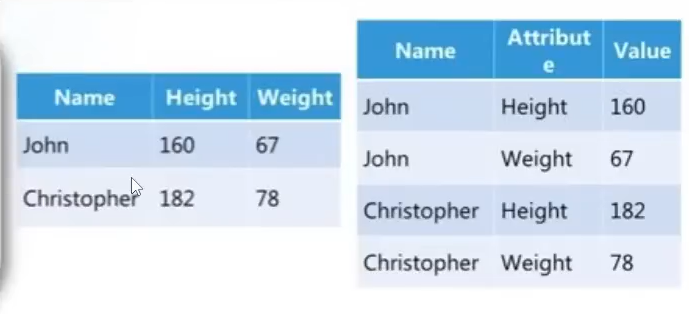

- The reason we need two different data format is because sometimes to do the analysis we need long format or wide format.

In [64]:
#melt -> It converts the wide data format into the long format

pd.DataFrame([{'mech':120,'cse':450,'ece':240}])

,mech,cse,ece
0,120,450,240


In [67]:
pd.DataFrame([{'mech':120,'cse':450,'ece':240}]).melt(var_name='branch',value_name='No. of Students')
#As we can melt converted the wide to long format

,branch,No. of Students
0,mech,120
1,cse,450
2,ece,240


In [73]:
L=[[120,450,240]]
pd.DataFrame(L,columns=['mech','cse','ece'])

,mech,cse,ece
0,120,450,240


In [77]:
d={
    "name":["John","Harry","Leo"],
    "DOB":[1998,2001,2003],
    "salary":["100K","650K","120K"]
}

df_1=pd.DataFrame(d)
df_1

,name,DOB,salary
0,John,1998,100K
1,Harry,2001,650K
2,Leo,2003,120K


In [79]:
df_1.melt(var_name='attributes')

,attributes,value
0,name,John
1,name,Harry
2,name,Leo
3,DOB,1998
4,DOB,2001
5,DOB,2003
6,salary,100K
7,salary,650K
8,salary,120K


In [84]:
#We can stop the columns that we don't want to converted into the rows
#Let's say I don't want salary as a row
df_1.melt(id_vars=['salary'],var_name='attributes')   #We can pass multiple columns in id_vars
#As we can see from the below DF this time the attributes were only name and DOB

,salary,attributes,value
0,100K,name,John
1,650K,name,Harry
2,120K,name,Leo
3,100K,DOB,1998
4,650K,DOB,2001
5,120K,DOB,2003


In [105]:
#Melt -> Real word examples

deaths=pd.read_csv('time_series_covid19_deaths_global.csv')
confirm=pd.read_csv('time_series_covid19_confirmed_global.csv')

In [100]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [101]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1081 entries, Province/State to 1/2/23
dtypes: float64(2), int64(1077), object(2)
memory usage: 2.4+ MB


In [106]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [107]:
confirm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1081 entries, Province/State to 1/2/23
dtypes: float64(2), int64(1077), object(2)
memory usage: 2.4+ MB


In [121]:
df=deaths.drop('Province/State',axis=1)
df_1=df.melt(id_vars=['Country/Region','Lat','Long'],var_name='Dates',value_name='No. of Deaths')
df_1

,Country/Region,Lat,Long,Dates,No. of Deaths
0,Afghanistan,33.939110,67.709953,1/22/20,0
1,Albania,41.153300,20.168300,1/22/20,0
2,Algeria,28.033900,1.659600,1/22/20,0
3,Andorra,42.506300,1.521800,1/22/20,0
4,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...
311248,West Bank and Gaza,31.952200,35.233200,1/2/23,5708
311249,Winter Olympics 2022,39.904200,116.407400,1/2/23,0
311250,Yemen,15.552727,48.516388,1/2/23,2159
311251,Zambia,-13.133897,27.849332,1/2/23,4024


In [128]:
temp_df=confirm.drop('Province/State',axis=1)
temp_df2=temp_df.melt(id_vars=['Country/Region','Lat','Long'],var_name='Dates',value_name='No. of Confirm cases')
temp_df2

,Country/Region,Lat,Long,Dates,No. of Confirm cases
0,Afghanistan,33.939110,67.709953,1/22/20,0
1,Albania,41.153300,20.168300,1/22/20,0
2,Algeria,28.033900,1.659600,1/22/20,0
3,Andorra,42.506300,1.521800,1/22/20,0
4,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...
311248,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,Yemen,15.552727,48.516388,1/2/23,11945
311251,Zambia,-13.133897,27.849332,1/2/23,334661


In [143]:
df_1
temp_df2
df_1.merge(temp_df2,how='inner',on=['Country/Region','Lat','Long','Dates'])

,Country/Region,Lat,Long,Dates,No. of Deaths,No. of Confirm cases
0,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,Albania,41.153300,20.168300,1/22/20,0,0
2,Algeria,28.033900,1.659600,1/22/20,0,0
3,Andorra,42.506300,1.521800,1/22/20,0,0
4,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...
313402,West Bank and Gaza,31.952200,35.233200,1/2/23,5708,703228
313403,Winter Olympics 2022,39.904200,116.407400,1/2/23,0,535
313404,Yemen,15.552727,48.516388,1/2/23,2159,11945
313405,Zambia,-13.133897,27.849332,1/2/23,4024,334661
